# Temperature Forecast Project using ML

### Problem statement

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("temperature.csv")

In [3]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

## Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

There are two target variable:

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [4]:
df.shape

(7752, 25)

The dataset contains :

Number of columns = 25

number of rows = 7752

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

observations: Most of the features have null values present in the dataset.

In [13]:
#Creating list of elements having null values.
df_remove_null = df.drop(['lat','lon','DEM','Slope','Solar radiation'],axis = 1)

In [15]:
#removing null values from the following dataset using fflill
for i in df_remove_null:
    df[i] = df[i].fillna(method='ffill')
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [16]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750     25.0  30-08-2017          20.0          11.3    19.794666   
7751     25.0  30-08-2017          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [19]:
df["Date"].value_counts()

30-08-2017    27
24-07-2017    25
24-07-2014    25
15-08-2016    25
17-08-2014    25
              ..
12-07-2014    25
30-06-2015    25
04-07-2015    25
19-07-2016    25
01-08-2015    25
Name: Date, Length: 310, dtype: int64

In [21]:
#converting date variable from object format to date time format
df['Date'] = pd.to_datetime(df["Date"])

In [31]:
df["Date"]

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
7750   2017-08-30
7751   2017-08-30
Name: Date, Length: 7752, dtype: datetime64[ns]

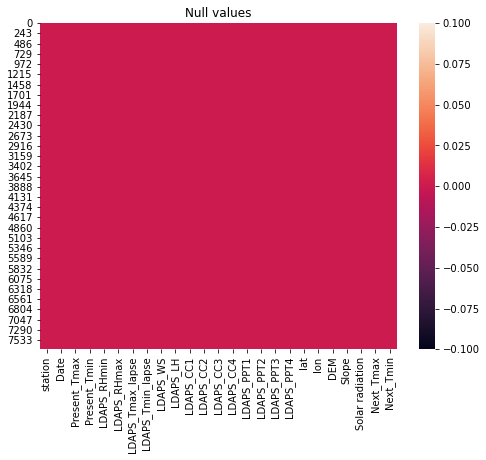

In [33]:
#plotting heatmap to see null values
plt.figure(figsize = [8,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [34]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.003096     29.770653     23.229141    56.712197    88.338817   
std       7.213213      2.969674      2.412744    14.627665     7.185832   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.937674    84.209478   
50%      13.000000     29.900000     23.400000    54.983641    89.760822   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.645517         23.543709     7.098365    62.238676   
std            2.952860          2.356354     2.176599    33.713771   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.206201   
50%           29.745671         23.782403     6.551400    56.487289   
75%           31.743892         25.186419     8.043589    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.371083  ...     0.480367     0.275978     0.266801    37.544722   
std       0.262284  ...     1.754885     1.156412     1.200654     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.320110  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.576711  ...     0.017607     0.008124     0.000000    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.273491   
std       0.079435    54.279780     1.370444       429.158867     3.128761   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932804  
std       2.488213  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [219]:
df_analysis = df.drop(['Date'],axis = 1)
print("observations:")
for i in df_analysis:
    print("Mean of the ",i,"is :", round(df[i].mean(),3))
    print("Median of the ",i,"is :",round(df[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(df[i].std(),3))
    print("Minimum value of ",i,"is :", round(df[i].min(),3))
    print("75th Quantile of ",i,"is :", round(df[i].quantile(0.75),3))
    print("Maximum value of ",i,"is :", round(df[i].max(),3))
    x = input("Observation : \n")
    print("\n\n")

observations:
Mean of the  station is : 13.003
Median of the  station is : 13.0
Standard deviation of  station is : 7.213
Minimum value of  station is : 1.0
75th Quantile of  station is : 19.0
Maximum value of  station is : 25.0
Observation : 
The mean and median are almost similar. standard deviation is low.Very less difference between maximum value and 75th quantile.



Mean of the  Present_Tmax is : 29.771
Median of the  Present_Tmax is : 29.9
Standard deviation of  Present_Tmax is : 2.97
Minimum value of  Present_Tmax is : 20.0
75th Quantile of  Present_Tmax is : 32.0
Maximum value of  Present_Tmax is : 37.6
Observation : 
The mean and median are almost similar. standard deviation is low.Very less difference between maximum value and 75th quantile.



Mean of the  Present_Tmin is : 23.229
Median of the  Present_Tmin is : 23.4
Standard deviation of  Present_Tmin is : 2.413
Minimum value of  Present_Tmin is : 11.3
75th Quantile of  Present_Tmin is : 24.9
Maximum value of  Present_Tmi

observations: to be added between the codes

In [39]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Date'] = LE.fit_transform(df["Date"])

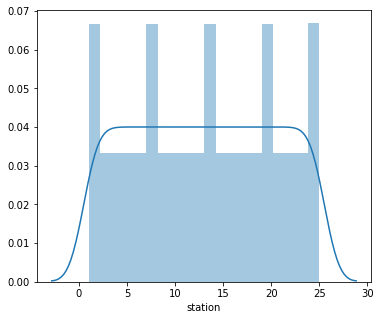

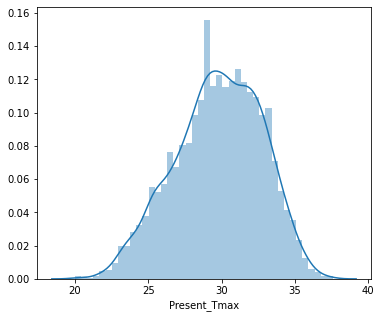

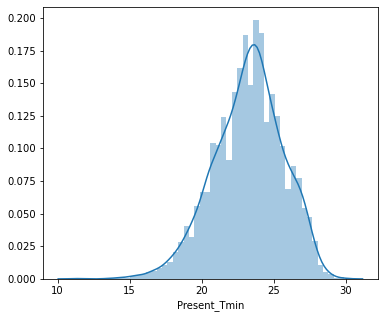

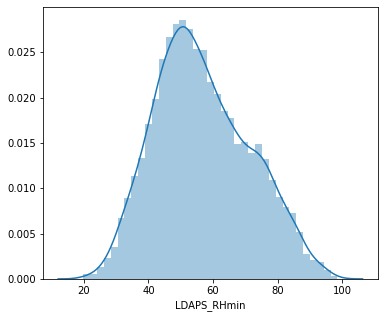

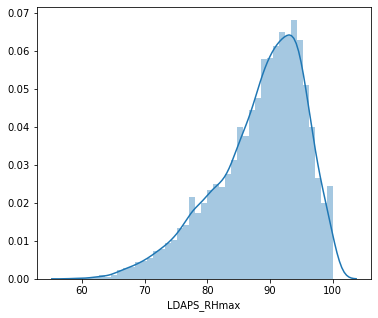

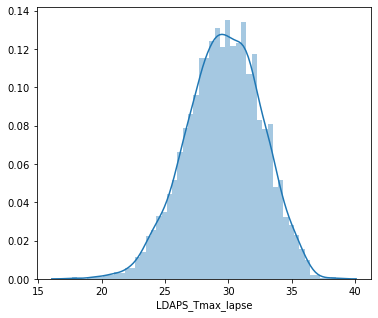

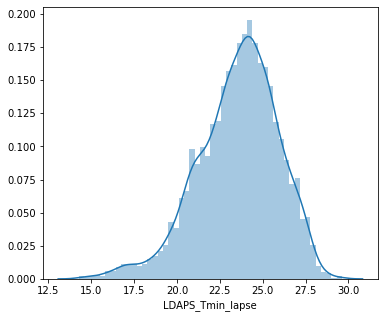

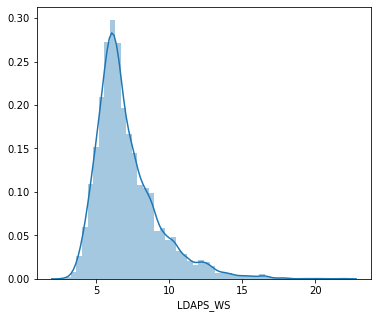

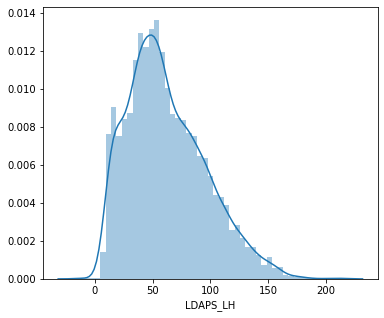

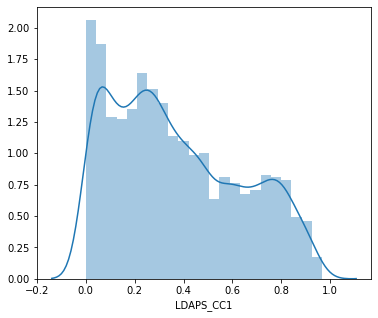

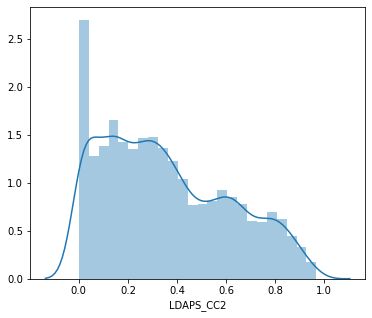

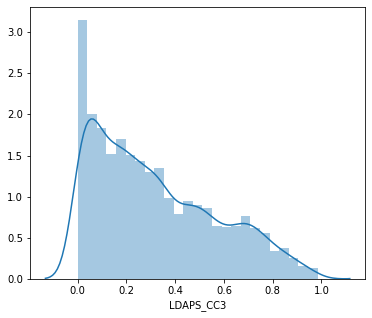

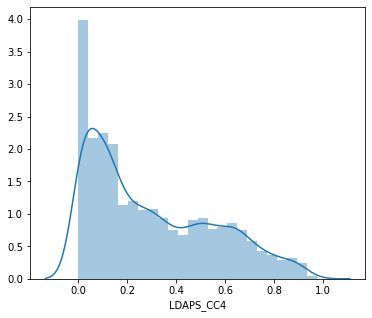

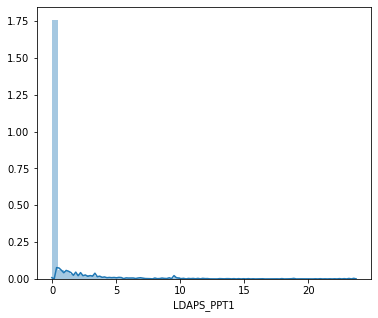

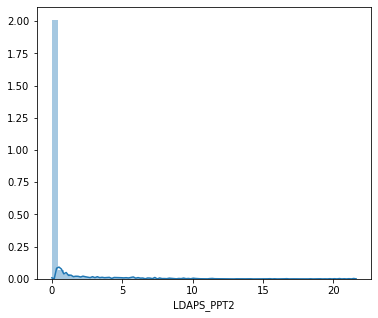

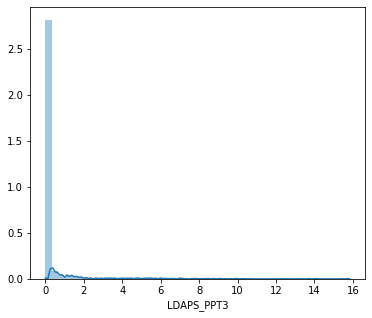

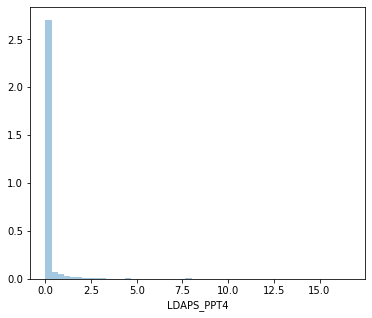

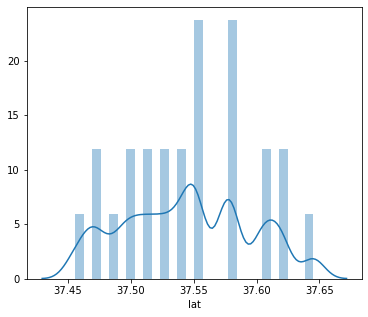

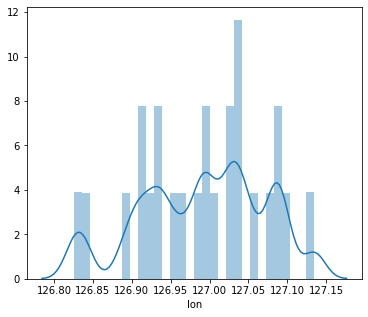

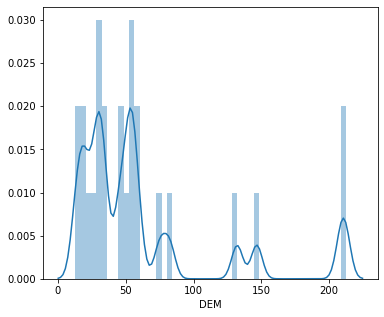

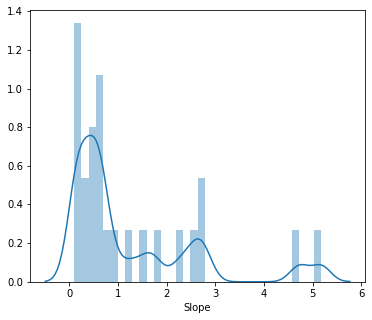

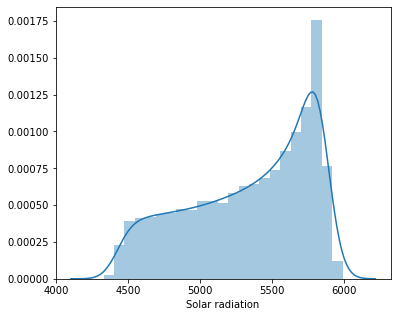

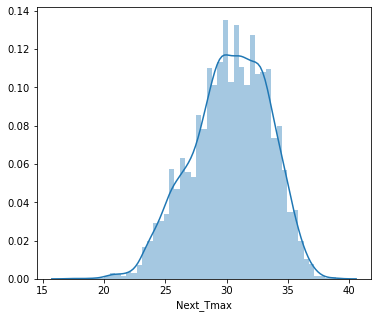

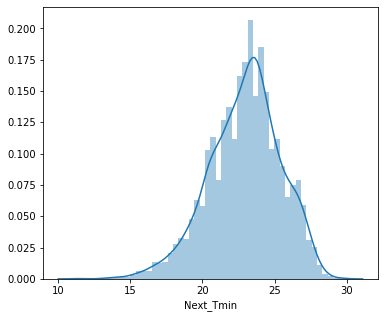

In [41]:
for i in df_analysis:
    plt.figure(figsize = [6,5])
    plt.xlabel(i)
    sns.distplot(df_analysis[[i]],kde = True)
    plt.show()

observation:
1. Present_Tmax is left skewed.
2. Present_Tmin is almost equally distributed.
3. LDAPS_RHmin is right skewed.
4. LDAPS_RHmax is left skewed.
5. LDAPS_Tmax_lapse is equally distributed.
6. LDAPS_Tmin_lapse is slighlty left skewed.
7. LDAPS_WS and LDAPS_LH are right skewed.
8. LDAPS_CC3 and LDAPS_CC4 are left skewed.
9. solar radiation is highly left skewed.
10. Next_Tmax is spreaded.
11. Next_Tmin is almot equally distributed.

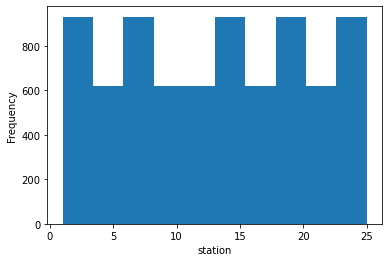

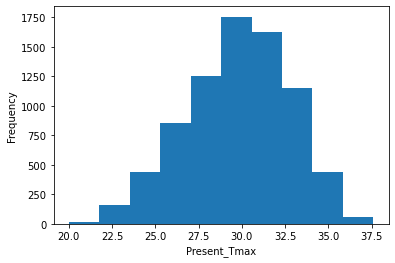

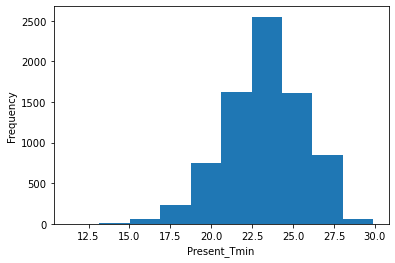

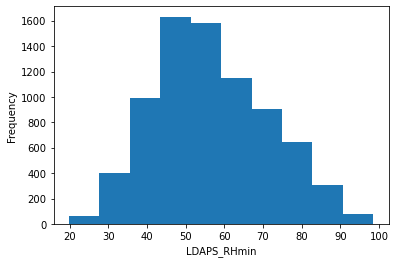

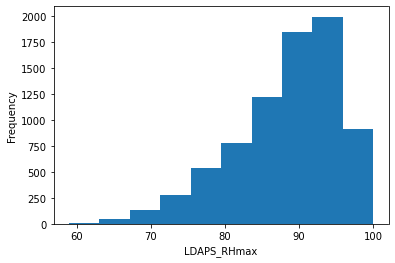

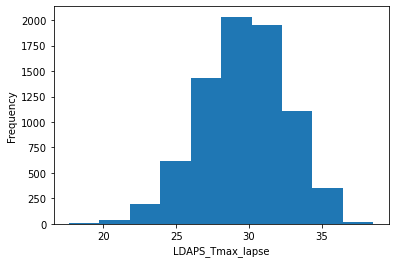

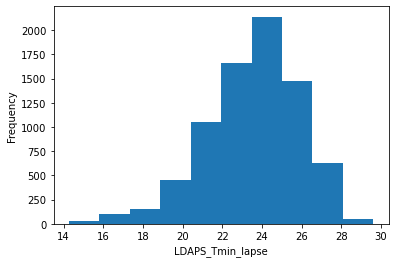

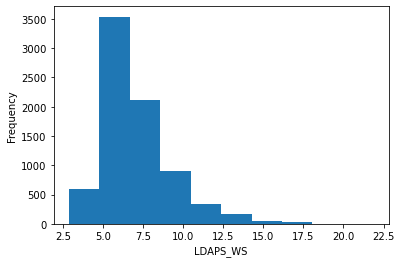

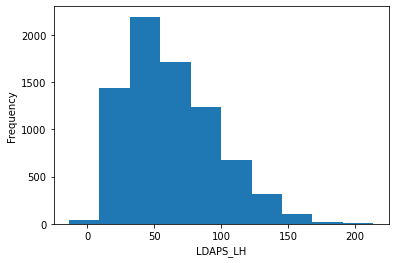

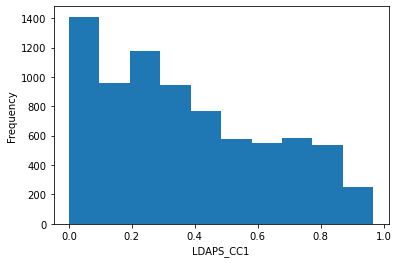

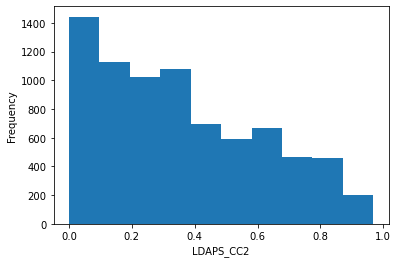

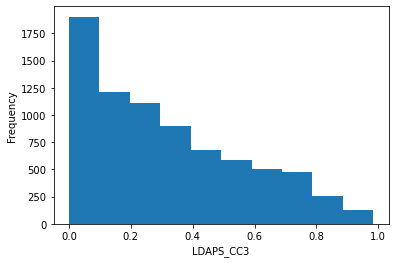

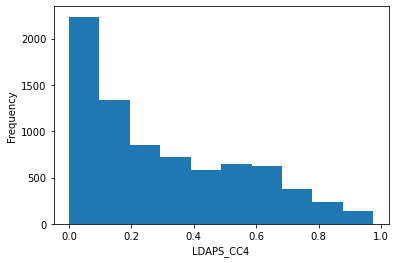

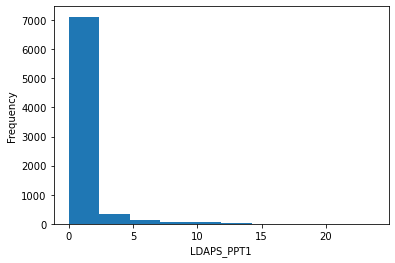

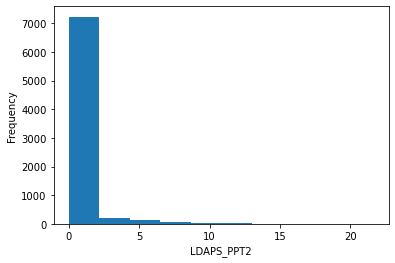

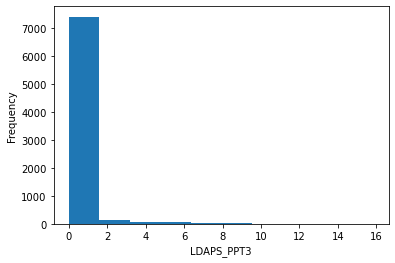

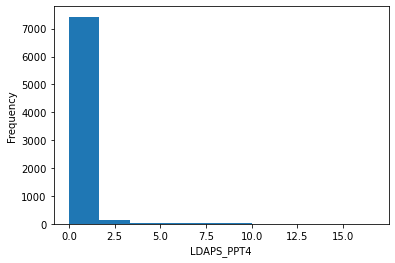

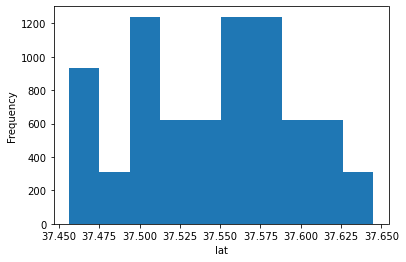

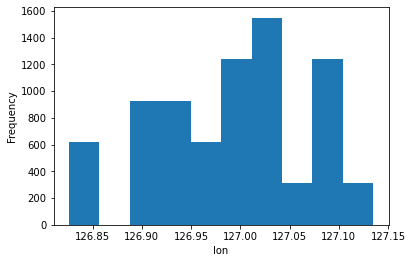

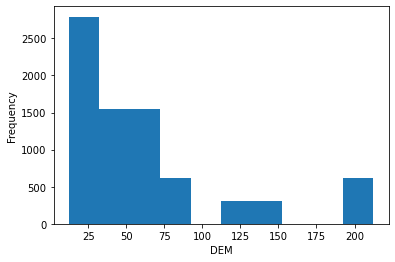

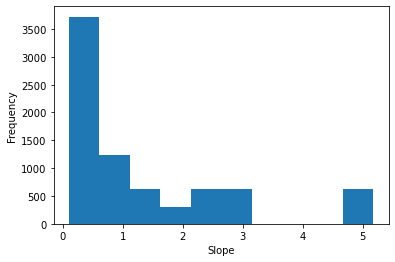

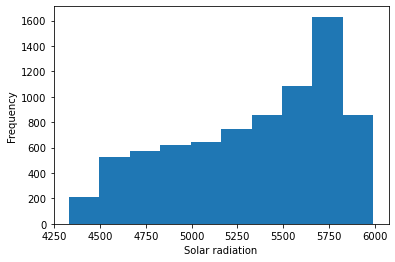

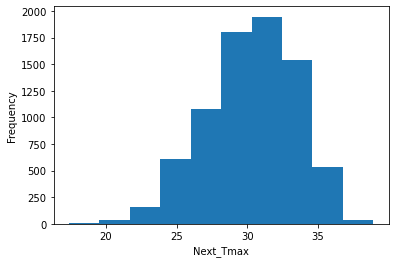

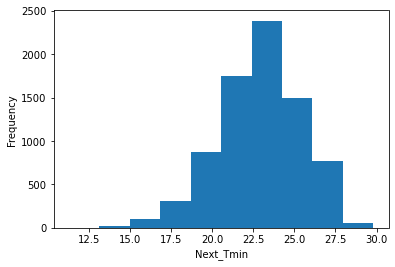

In [63]:
#using hitogram to see the distribution of the graph
for i in df_analysis:
    plt.figure(figsize=[6,4])
    plt.xlabel(i)
    df_analysis[i].plot.hist()

<Figure size 432x360 with 0 Axes>

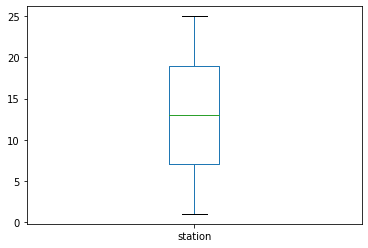

<Figure size 432x360 with 0 Axes>

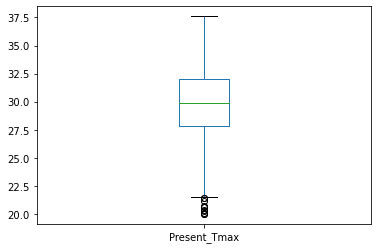

<Figure size 432x360 with 0 Axes>

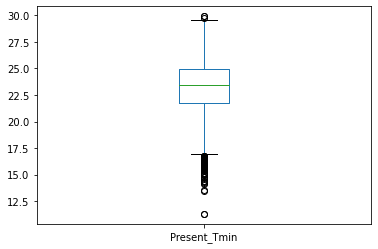

<Figure size 432x360 with 0 Axes>

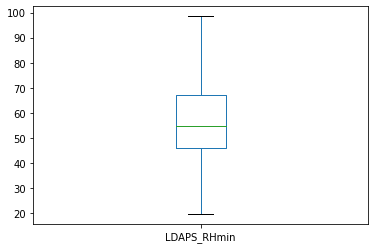

<Figure size 432x360 with 0 Axes>

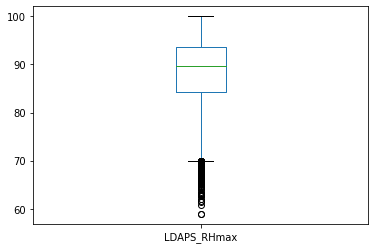

<Figure size 432x360 with 0 Axes>

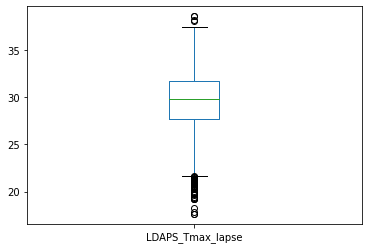

<Figure size 432x360 with 0 Axes>

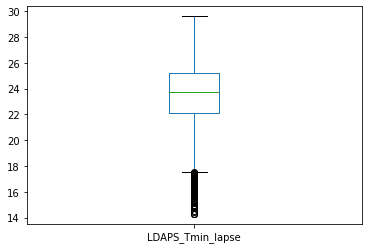

<Figure size 432x360 with 0 Axes>

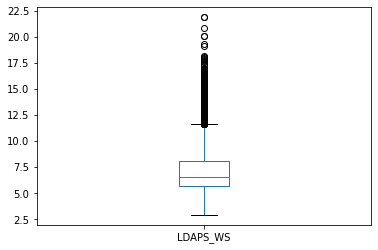

<Figure size 432x360 with 0 Axes>

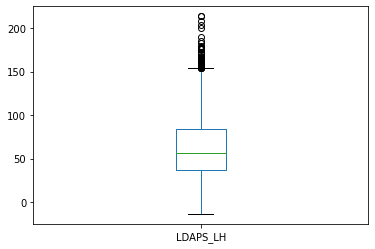

<Figure size 432x360 with 0 Axes>

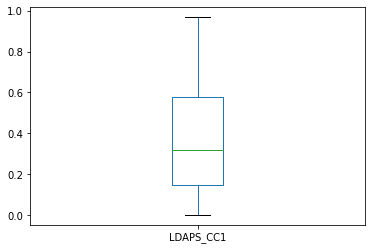

<Figure size 432x360 with 0 Axes>

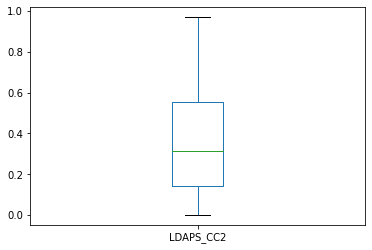

<Figure size 432x360 with 0 Axes>

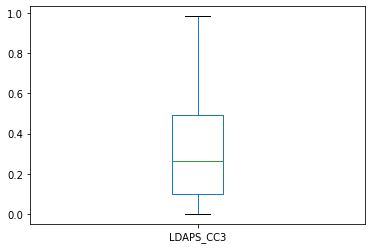

<Figure size 432x360 with 0 Axes>

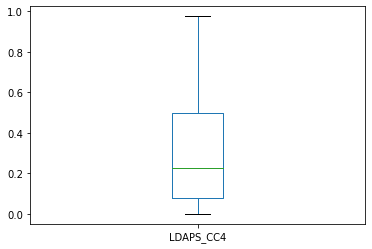

<Figure size 432x360 with 0 Axes>

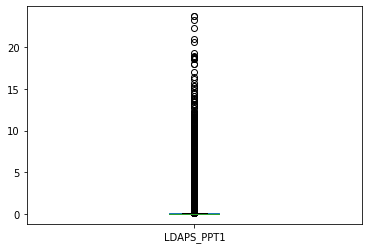

<Figure size 432x360 with 0 Axes>

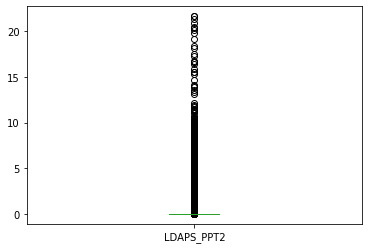

<Figure size 432x360 with 0 Axes>

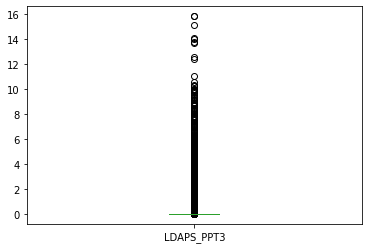

<Figure size 432x360 with 0 Axes>

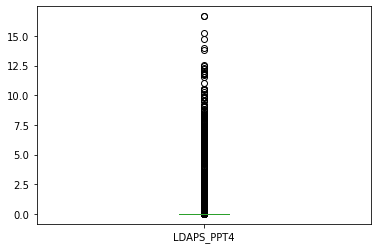

<Figure size 432x360 with 0 Axes>

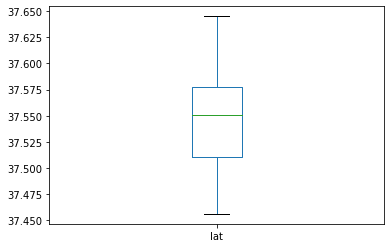

<Figure size 432x360 with 0 Axes>

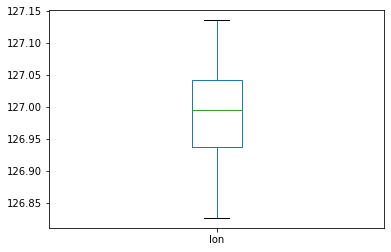

<Figure size 432x360 with 0 Axes>

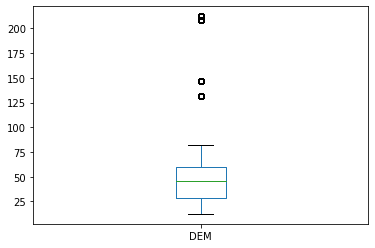

<Figure size 432x360 with 0 Axes>

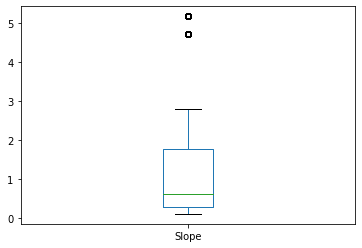

<Figure size 432x360 with 0 Axes>

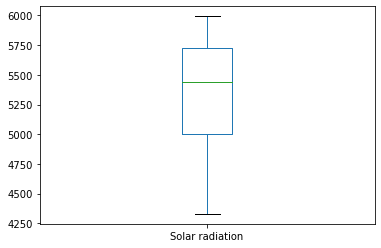

<Figure size 432x360 with 0 Axes>

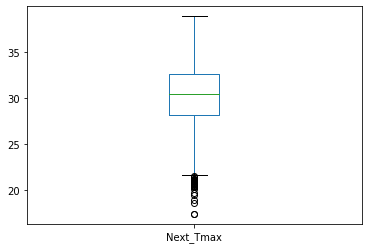

<Figure size 432x360 with 0 Axes>

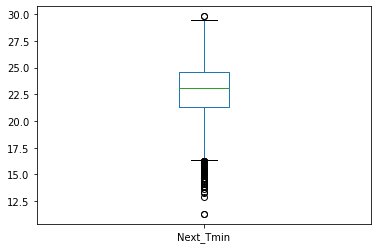

In [47]:
#checking for outliers using boxplot
for i in df_analysis:
    plt.figure(figsize = [6,5])
    df_analysis[[i]].plot.box()
    plt.show()

observations :
1. Present_max,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH ,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope has very huge number of outliers.SOme of them are present near the whisker and some are very far from it.
2. Next_Tmin and Next_Tmax also has few outliers but they are our target variable so we'll not be removing outliers from them.

In [48]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [49]:
#creating list of the features who has outliers
df_outliers = df[["Present_Tmax","Present_Tmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH",'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM','Slope',]]

In [60]:
#removing outliers using zscore method
from scipy.stats import zscore
z = np.abs(zscore(df_outliers))
threshold = 4
print(np.where(z>4))

(array([  25,   26,   27,   28,   29,   35,   36,   37,   39,   41,   43,
         44,   44,   45,   49,  150,  151,  152,  153,  154,  155,  156,
        157,  159,  160,  161,  162,  163,  164,  165,  166,  167,  168,
        169,  170,  171,  172,  173,  174,  194,  282,  283,  284,  288,
        290,  292,  298,  299,  304,  305,  305,  307,  307,  309,  309,
        310,  313,  313,  315,  315,  317,  317,  321,  321,  325,  326,
        328,  331,  341,  343,  344,  353,  394,  525,  525,  526,  527,
        528,  528,  529,  530,  531,  531,  532,  532,  533,  533,  534,
        534,  535,  536,  536,  537,  538,  538,  539,  539,  540,  541,
        542,  543,  543,  544,  544,  545,  546,  547,  547,  548,  548,
        549,  549,  569,  594, 1000, 1001, 1002, 1003, 1005, 1006, 1007,
       1009, 1010, 1011, 1012, 1013, 1014, 1015, 1017, 1018, 1019, 1020,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 1

In [51]:
for i in df_outliers:
    df[i] = df_outliers[i]

In [61]:
#Here we used threshold value as 4 because at threshold value 3 the data loss is aroung 12 percent.
df_new = df[(z<4).all(axis = 1)]
df_new.shape

(7254, 25)

In [62]:
data_lose = ((df.shape[0] - df_new.shape[0])/df.shape[0])*100
data_lose

6.424148606811146

observations: There the outliers are remoc=ved with a data loss of 6.42 percent

In [65]:
df_target = df[["Next_Tmax","Next_Tmin"]]

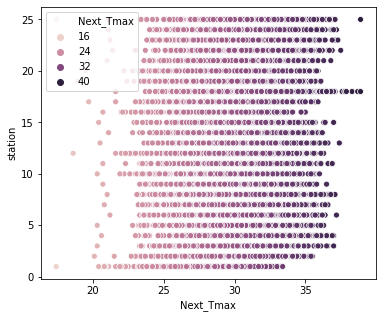

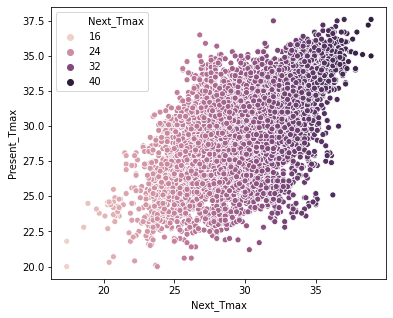

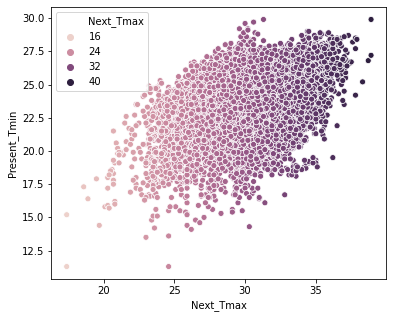

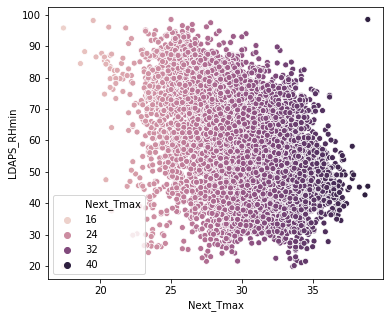

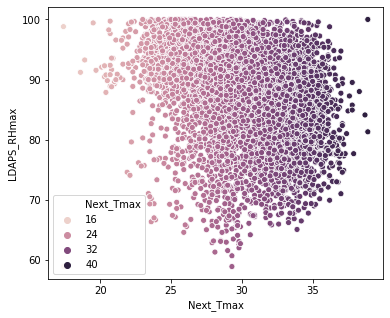

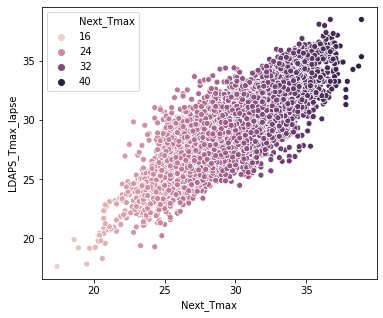

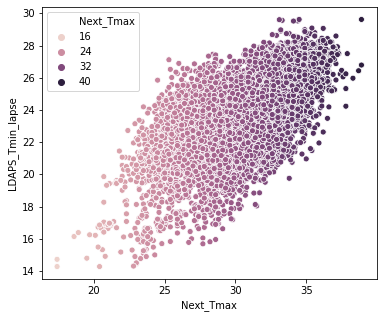

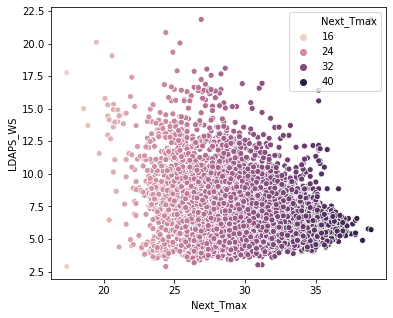

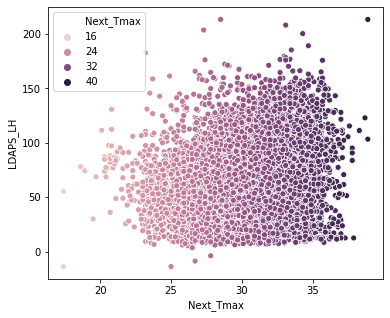

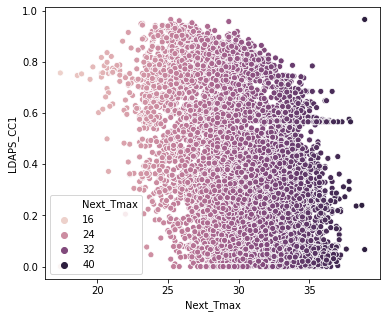

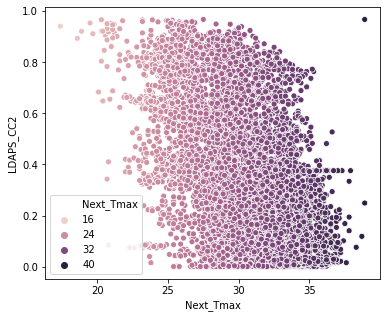

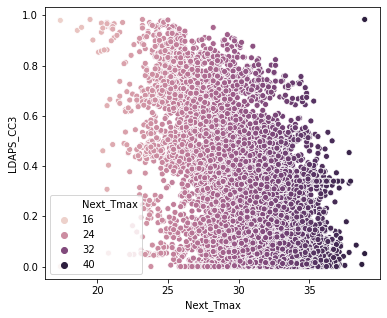

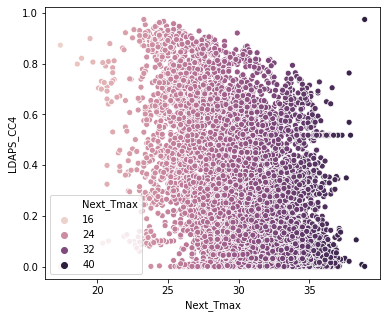

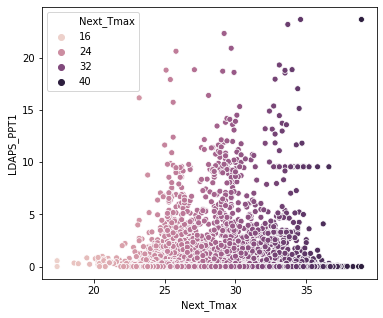

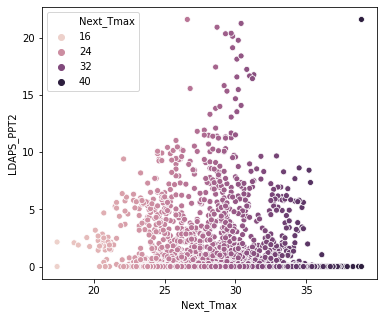

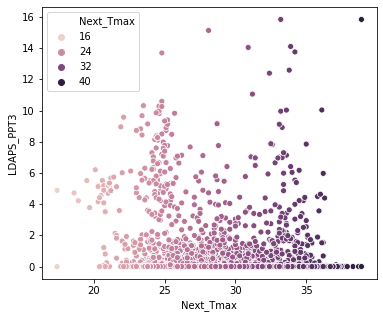

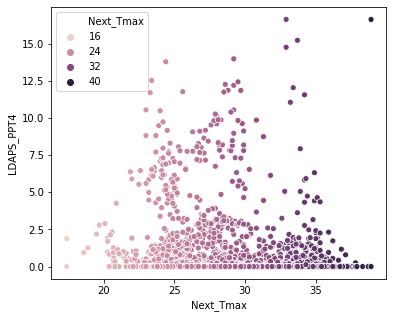

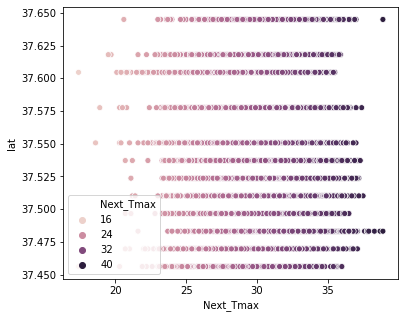

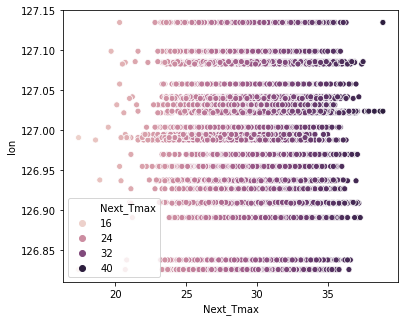

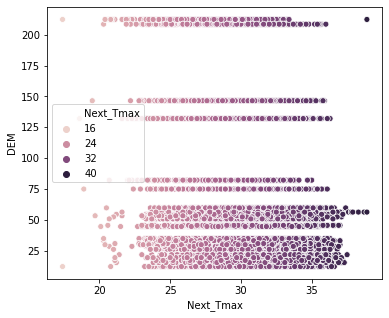

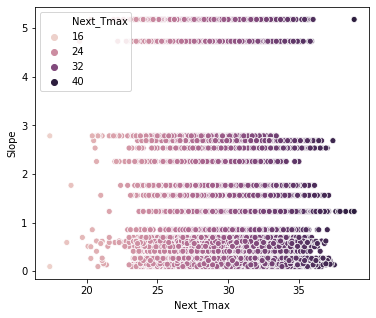

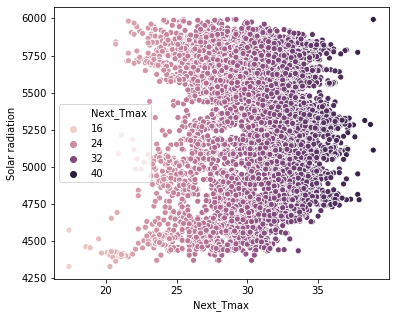

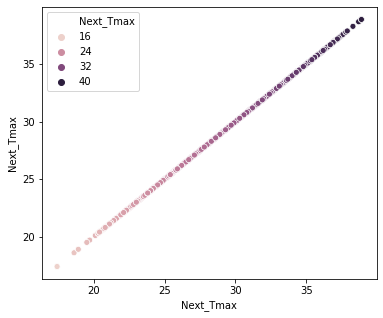

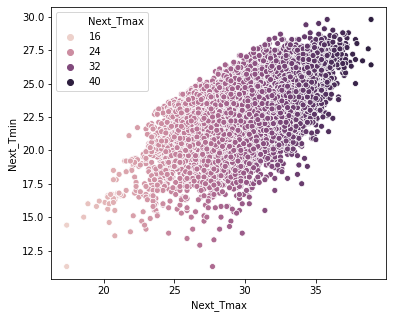

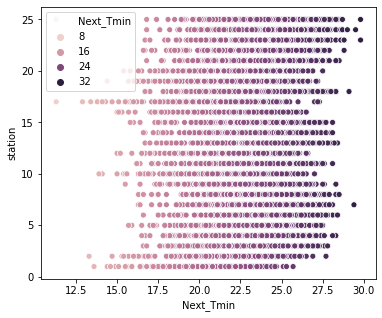

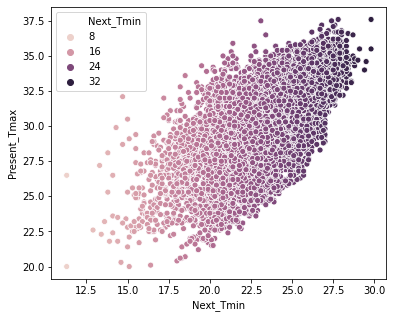

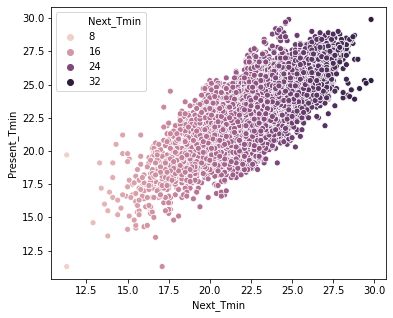

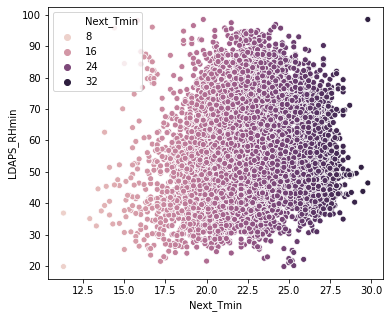

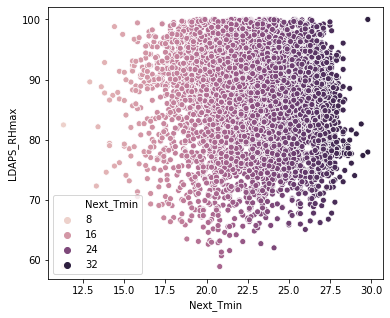

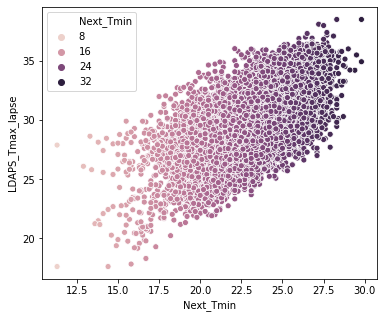

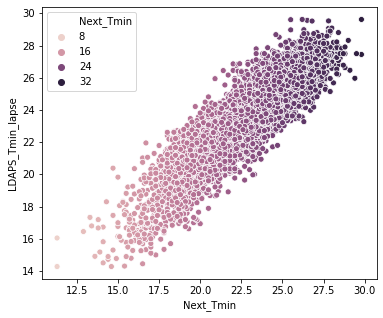

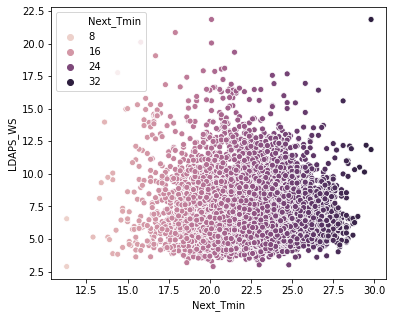

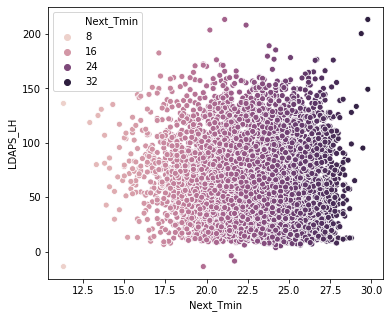

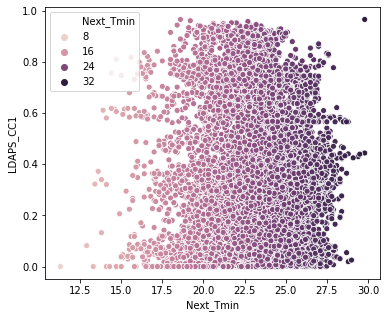

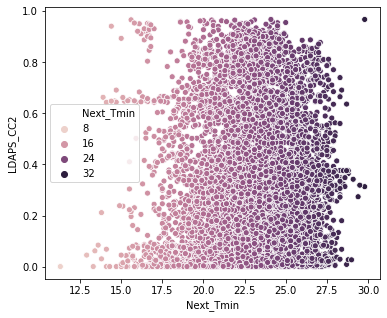

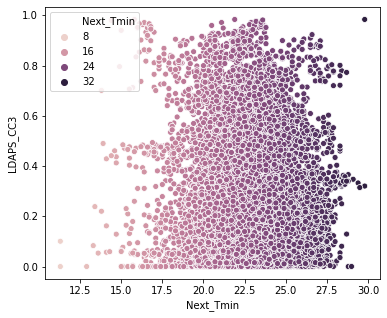

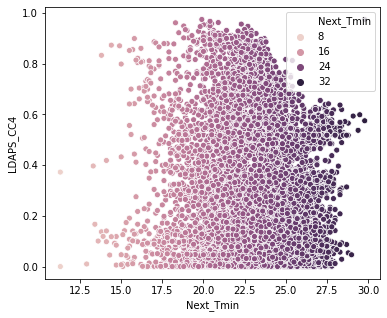

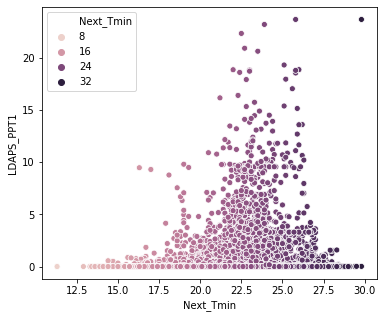

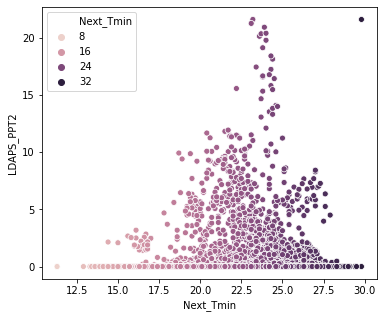

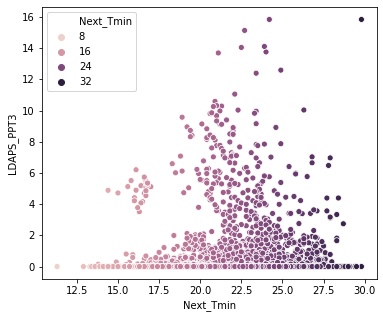

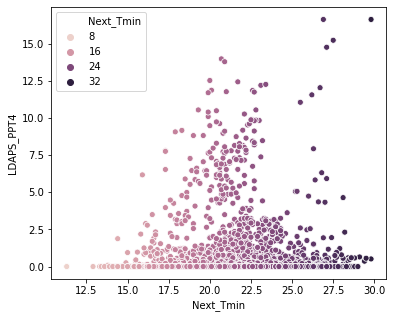

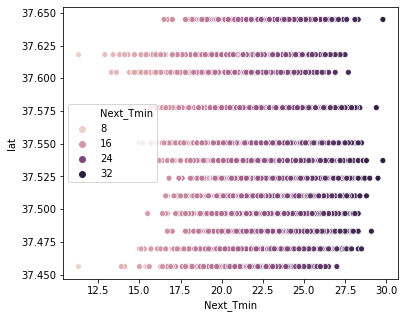

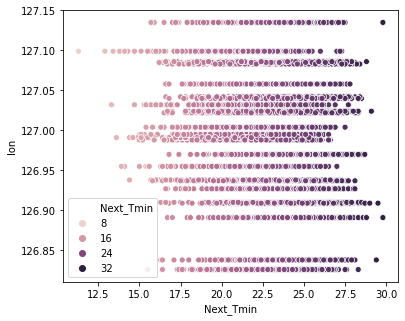

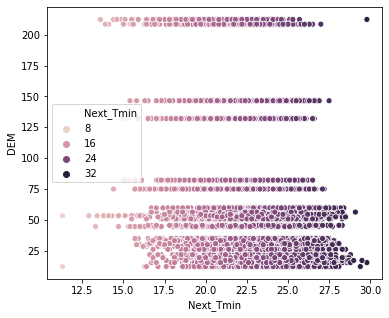

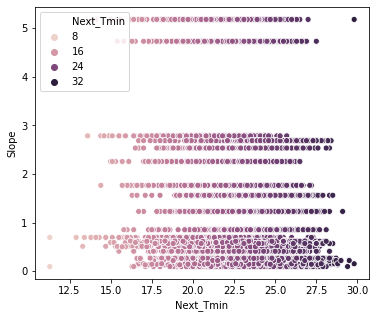

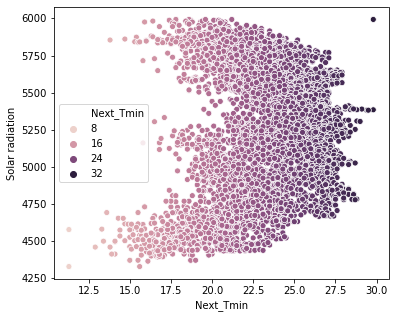

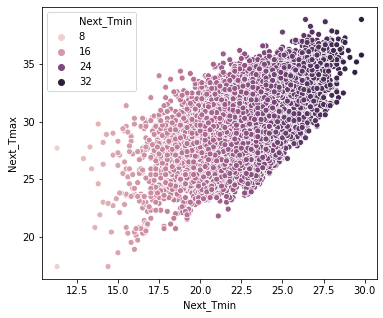

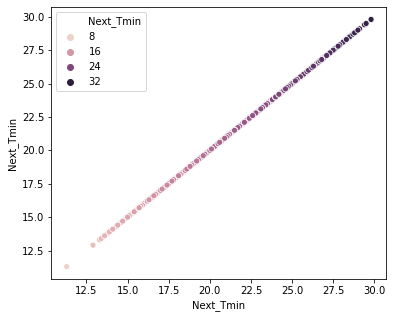

In [66]:
for i in df_target:
    for j in df_analysis:
        plt.figure(figsize = [6,5])
        x = df_target[i]
        y = df_analysis[j]
        plt.xlabel(i)
        plt.ylabel(j)
        sns.scatterplot(x,y , hue = df[i])
        plt.show()

observations: 
1. As Present_Tmax, LDAPS_Tmax_lapse ,LDAPS_Tmin_lapse,Next_tmin,Present_Tmin increases Next_tmax also increases.
2. LDAPS_RHmin increases Next_tmax decreases.
3. Present_Tmax,Present_Tmin, LDAPS_Tmax_lapse ,LDAPS_Tmin_lapse,Next_max increases Next_tmin also increases.

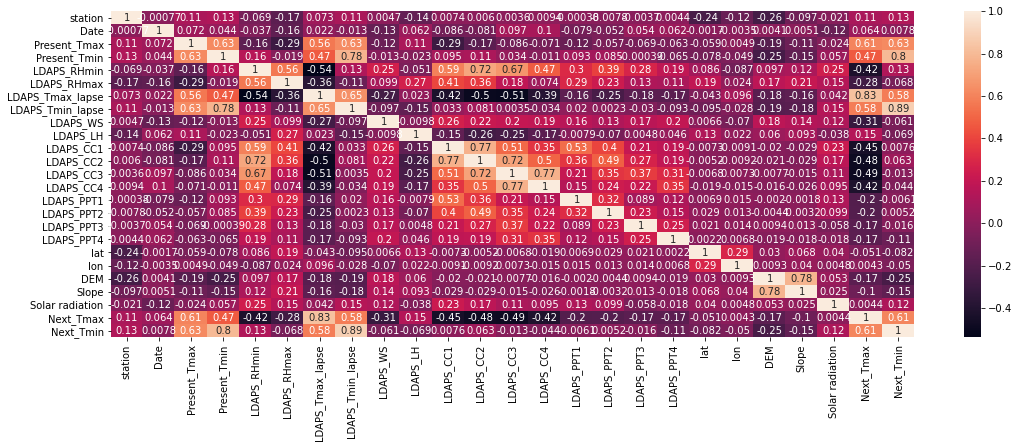

In [68]:
corr_matrix = df_new.corr()
plt.figure(figsize = [18,6])
sns.heatmap(corr_matrix,annot = True)

In [222]:
#now we'll look at  the correlation of the all variables with the target variable
corr1=corr_matrix['Next_Tmax'].sort_values(ascending = False)
corr1 = pd.DataFrame(corr)
corr1

Next_Tmax
Next_Tmax          1.000000
LDAPS_Tmax_lapse   0.828647
Next_Tmin          0.610097
Present_Tmax       0.607230
LDAPS_Tmin_lapse   0.583617
Present_Tmin       0.467656
LDAPS_LH           0.145476
station            0.110225
Date               0.063885
Solar radiation    0.004434
lon                0.004330
lat               -0.050975
Slope             -0.101237
LDAPS_PPT4        -0.170039
DEM               -0.173357
LDAPS_PPT3        -0.173503
LDAPS_PPT2        -0.198576
LDAPS_PPT1        -0.203807
LDAPS_RHmax       -0.279135
LDAPS_WS          -0.314382
LDAPS_CC4         -0.415359
LDAPS_RHmin       -0.418695
LDAPS_CC1         -0.446219
LDAPS_CC2         -0.478740
LDAPS_CC3         -0.489402

observations: LDAPS_Tmax_lapse and LDAPS_CC3  is highly correlated to Next_Tmax with correlation value (0.828647) and (-0.4894020) respectively. whereas lon is least correlated with the Next_Tmax.

In [224]:
#now we'll look at  the correlation of the all variables with the target variable
corr2=corr_matrix['Next_Tmin'].sort_values(ascending = False)
corr2 = pd.DataFrame(corr2)
corr2

Next_Tmin
Next_Tmin          1.000000
LDAPS_Tmin_lapse   0.885459
Present_Tmin       0.798626
Present_Tmax       0.625489
Next_Tmax          0.610097
LDAPS_Tmax_lapse   0.581205
LDAPS_RHmin        0.134066
station            0.130278
Solar radiation    0.121479
LDAPS_CC2          0.062778
Date               0.007841
LDAPS_CC1          0.007635
LDAPS_PPT2         0.005205
LDAPS_PPT1        -0.006148
LDAPS_CC3         -0.013080
LDAPS_PPT3        -0.015875
LDAPS_CC4         -0.043978
lon               -0.049909
LDAPS_WS          -0.060554
LDAPS_RHmax       -0.068125
LDAPS_LH          -0.069333
lat               -0.081780
LDAPS_PPT4        -0.112187
Slope             -0.148924
DEM               -0.249642

observations: LDAPS_Tmax_lapse and DEM is highly correlated to Next_Tmin with correlation value (0.885459) and (-0.249642) respectively. whereas LDAPS_PPT1 is least correlated with the Next_Tmin.

In [73]:
#checking skewness of the datset
df_new.skew()

station             0.000792
Date               -0.012525
Present_Tmax       -0.309187
Present_Tmin       -0.349854
LDAPS_RHmin         0.320676
LDAPS_RHmax        -0.786227
LDAPS_Tmax_lapse   -0.213647
LDAPS_Tmin_lapse   -0.563632
LDAPS_WS            1.268933
LDAPS_LH            0.627817
LDAPS_CC1           0.527686
LDAPS_CC2           0.488220
LDAPS_CC3           0.693327
LDAPS_CC4           0.697539
LDAPS_PPT1          3.870242
LDAPS_PPT2          4.656672
LDAPS_PPT3          5.627397
LDAPS_PPT4          6.171266
lat                 0.092200
lon                -0.276128
DEM                 1.735113
Slope               1.579693
Solar radiation    -0.514905
Next_Tmax          -0.325327
Next_Tmin          -0.408219
dtype: float64

In [90]:
#Here we'll storing the the skewed features greater than +0.5 and less than -0.5 in an empty list and after words we'll remove the skewness
df_skew2 = []
for i in df_analysis:
    if df_new[i].skew() > 0.5 or df_new[i].skew() < -0.5 :
        print(i)
        df_skew2.append(i)

LDAPS_RHmax
LDAPS_Tmin_lapse
LDAPS_WS
LDAPS_LH
LDAPS_CC1
LDAPS_CC3
LDAPS_CC4
LDAPS_PPT1
LDAPS_PPT2
LDAPS_PPT3
LDAPS_PPT4
DEM
Slope
Solar radiation


In [91]:
df_skew2

['LDAPS_RHmax',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'DEM',
 'Slope',
 'Solar radiation']

In [104]:
# Splitting the dataset into x and y and then removing the skewness using powertransformer
x1 = df_new.drop(["Next_Tmax","Next_Tmin"],axis = 1)

In [79]:
y = df_new[["Next_Tmax","Next_Tmin"]]

In [95]:
df_skewness = df_new[['LDAPS_RHmax',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'DEM',
 'Slope',
 'Solar radiation']]

In [105]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
for i in df_skew2:
    x1[i] = power.fit_transform(x1[[i]])

In [106]:
x1.skew()

station             0.000792
Date               -0.012525
Present_Tmax       -0.309187
Present_Tmin       -0.349854
LDAPS_RHmin         0.320676
LDAPS_RHmax        -0.111516
LDAPS_Tmax_lapse   -0.213647
LDAPS_Tmin_lapse   -0.027042
LDAPS_WS            0.006941
LDAPS_LH           -0.023841
LDAPS_CC1           0.057993
LDAPS_CC2           0.488220
LDAPS_CC3           0.092543
LDAPS_CC4           0.138198
LDAPS_PPT1          1.521436
LDAPS_PPT2          1.762163
LDAPS_PPT3          1.894809
LDAPS_PPT4          2.206428
lat                 0.092200
lon                -0.276128
DEM                 0.039783
Slope               0.234372
Solar radiation    -0.175455
dtype: float64

In [115]:
for i in x1[["LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]]:
    x1[i] = power.fit_transform(x1[[i]])

station             0.000792
Date               -0.012525
Present_Tmax       -0.309187
Present_Tmin       -0.349854
LDAPS_RHmin         0.320676
LDAPS_RHmax        -0.111516
LDAPS_Tmax_lapse   -0.213647
LDAPS_Tmin_lapse   -0.027042
LDAPS_WS            0.006941
LDAPS_LH           -0.023841
LDAPS_CC1           0.057993
LDAPS_CC2           0.488220
LDAPS_CC3           0.092543
LDAPS_CC4           0.138198
LDAPS_PPT1          0.611101
LDAPS_PPT2          0.848964
LDAPS_PPT3          0.950828
LDAPS_PPT4          1.340425
lat                 0.092200
lon                -0.276128
DEM                 0.039783
Slope               0.234372
Solar radiation    -0.175455
dtype: float64

In [190]:
#Using minmaxscaler to scale the data.
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
for i in x1:
    x1[i]= ms.fit_transform(x1[[i]])

In [191]:
#checking the best random state for the model accuracy
from sklearn.linear_model import LinearRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = .20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    prdlr = lr.predict(x_test)
    accu = r2_score(y_test,prdlr)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.8186469672597749 at random state :  96


observation: The accuracy is maximum at random state 96.

In [192]:
#creating train test split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = .20,random_state = 96)

In [193]:
#first using Linear regression to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdlr))
print("Mean Squared error :",mean_squared_error(y_test,prdlr))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdlr))

Accuracy of the model : 0.8186469672597749
Mean Squared error : 1.435418937529423
Mean Absolute eroor : 0.9158322035577835


In [194]:
#first using DecisionTreeRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdtc))
print("Mean Squared error :",mean_squared_error(y_test,prdtc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdtc))

Accuracy of the model : 0.7811980592638639
Mean Squared error : 1.7001585113714675
Mean Absolute eroor : 0.9519641626464517


In [195]:
#first using RandomForestRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)
prrfc = rfc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prrfc))
print("Mean Squared error :",mean_squared_error(y_test,prrfc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prrfc))

Accuracy of the model : 0.9100235912593758
Mean Squared error : 0.6970473783597515
Mean Absolute eroor : 0.6260551343900757


In [196]:
#first using KNeighborsRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
prKNN = KNN.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prKNN))
print("Mean Squared error :",mean_squared_error(y_test,prKNN))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prKNN))

Accuracy of the model : 0.7847312639400655
Mean Squared error : 1.6539394900068922
Mean Absolute eroor : 0.96421088904204


observation: Among all the models Random forest regressor shows the highest accuracy score and least mean squared error.

In [197]:
#Checking cross value score for each model

In [198]:
from sklearn.model_selection import cross_val_score
cross_val1 = cross_val_score(LinearRegression(),x1,y,cv = 5)
print("Cross Validation score for Linear regression : ",cross_val1.mean())

Cross Validation score for Linear regression :  0.7185570941842175


In [199]:
cross_val2 = cross_val_score(RandomForestRegressor(),x1,y,cv = 5)
print("Cross Validation Score for Random Forest Regressor",cross_val2.mean())

Cross Validation Score for Random Forest Regressor 0.7186113725425585


In [200]:
cross_val3 = cross_val_score(DecisionTreeRegressor(),x1,y,cv = 5)
print("Cross Validation Score for Decision tree regressor",cross_val3.mean())

Cross Validation Score for Decision tree regressor 0.43085816680705796


In [202]:
cross_val4 = cross_val_score(KNeighborsRegressor(),x1,y,cv = 5)
print("Cross Validation Score K Neighbors ",np.abs(cross_val4).mean())

Cross Validation Score K Neighbors  0.4146859606861115


Observations: After comparing cross validation score and accuracy score of each model we concluded that linear regression has the least difference between the two score.Therefore we'll be using the Linear regression model.

In [203]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in GridSearchCV
parameters = {'fit_intercept' : [True,False],
             'normalize' : [True,False]
             ,'n_jobs' : [1,10],
             'positive' :[True,False] }

In [204]:
GVC = GridSearchCV(LinearRegression(),parameters,cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, 10],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [205]:
#checking the best parameters
GVC.best_params_

{'fit_intercept': True, 'n_jobs': 1, 'normalize': True, 'positive': False}

In [206]:
#using the parameters in Linear Regression to create model
modlr = LinearRegression(fit_intercept = True, n_jobs = 1, normalize = True, positive = False)
modlr.fit(x_train,y_train)
pred = modlr.predict(x_test)
print("accuracy score of the model is :",r2_score(y_test,pred)*100)

accuracy score of the model is : 81.8646967259775


In [207]:
print("Mean Squared error :",mean_squared_error(y_test,pred))
print("Mean Absolute eroor :",mean_absolute_error(y_test,pred))

Mean Squared error : 1.4354189375294233
Mean Absolute eroor : 0.9158322035577824
